# Predicting car insurance sales
> A notebook exploring a car insurance quote dataset to build a predicitive model to classify offered quotes as purchased or not purchased.

- toc: true 
- badges: false
- comments: true
- categories: [classification]
- image: images/classification2.png
- author: Aidan Hood

## Summary


## Libraries

In [14]:
#collapse-hide
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings(action='ignore')
pd.set_option("max_columns", 25)

## Data input and exploration

In [15]:
df = pd.read_csv("./insurance_quotes.csv")

df.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
0,48.0,7000.0,41.961971,419.619709,7000.0,366.105677,8.711803,29/05/2020,M,0
1,32.0,8000.0,53.448931,534.489312,6000.0,306.560408,8.754815,03/07/2019,S,0
2,32.0,7000.0,48.042838,480.428376,6000.0,430.070380,6.942515,04/10/2019,M,0
3,32.0,10000.0,38.572157,385.721570,7000.0,493.840343,9.165431,22/09/2020,S,0
4,28.0,9000.0,33.317349,333.173490,5000.0,416.459533,6.810972,08/09/2019,M,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_Age            49506 non-null  float64
 1   Vehicle_Value         49491 non-null  float64
 2   Tax                   49519 non-null  float64
 3   Price                 49504 non-null  float64
 4   Vehicle_Mileage       49464 non-null  float64
 5   Credit_Score          49478 non-null  float64
 6   Licence_Length_Years  49508 non-null  float64
 7   Date                  50000 non-null  object 
 8   Marital_Status        49512 non-null  object 
 9   Sale                  50000 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB


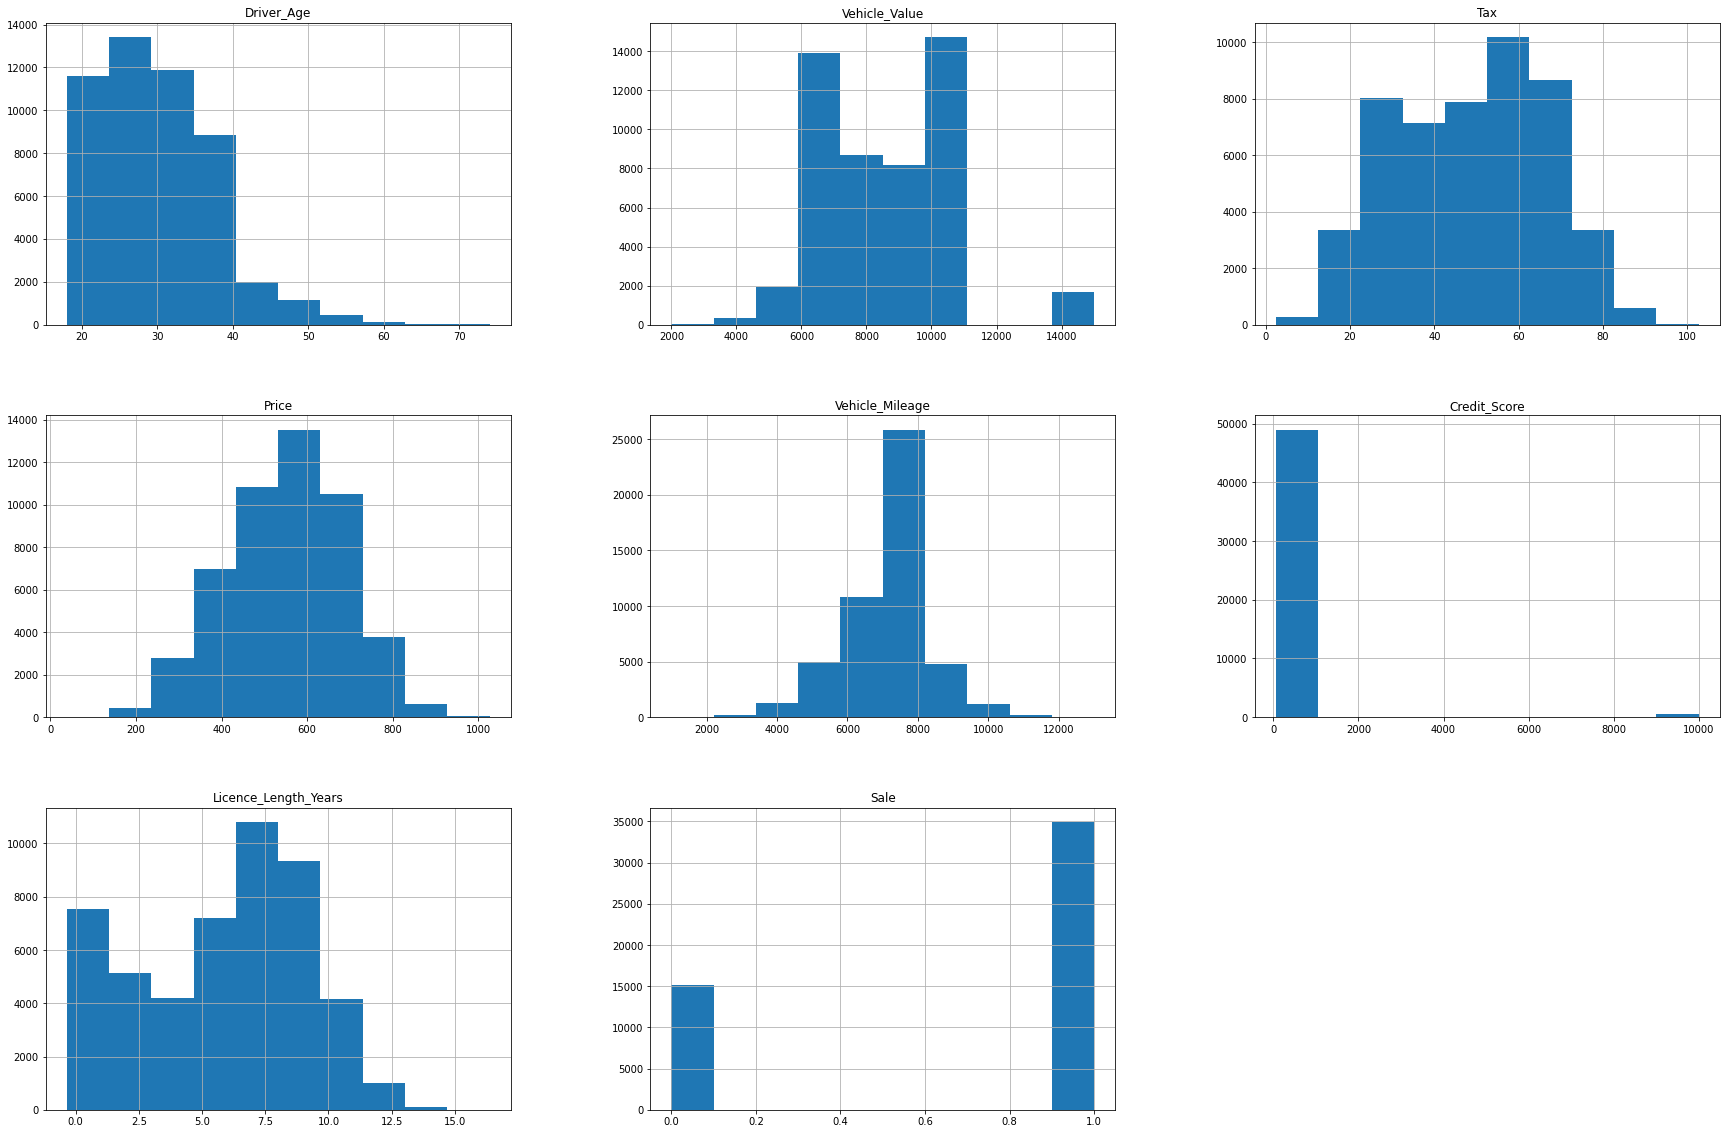

In [17]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

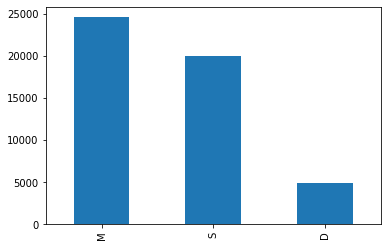

In [18]:
df['Marital_Status'].value_counts().plot(kind='bar')

## Data Cleaning

## Feature Engineering

## Removing Correlated Features

In [19]:
corr_features =[]

for i , r in df.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1

feat =[]
for i in corr_features:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])

df.drop(list(set(feat)), axis=1, inplace=True)

In [20]:
df.corr()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Sale
Driver_Age,1.000000,-0.056902,-0.054444,-0.073941,-0.038755,-0.000212,0.684834,-0.252439
Vehicle_Value,-0.056902,1.000000,0.356252,0.012098,-0.076091,0.006683,-0.038003,0.003295
Tax,-0.054444,0.356252,1.000000,0.741878,0.102390,0.006277,-0.026797,0.448177
Price,-0.073941,0.012098,0.741878,1.000000,0.145926,0.001508,-0.031432,0.664755
Vehicle_Mileage,-0.038755,-0.076091,0.102390,0.145926,1.000000,-0.002890,-0.025058,0.003381
Credit_Score,-0.000212,0.006683,0.006277,0.001508,-0.002890,1.000000,-0.003690,-0.001618
Licence_Length_Years,0.684834,-0.038003,-0.026797,-0.031432,-0.025058,-0.003690,1.000000,-0.118463
Sale,-0.252439,0.003295,0.448177,0.664755,0.003381,-0.001618,-0.118463,1.000000


## Preparing Test and Train Sets

## Dealing With Class Imbalance

## Dealing With Categorical Variables

## Normalization

## Model Selection

## Hyperparameter Tuning

## Model Implementation

## Model Evaluation